In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv('/content/drive/My Drive/OCR/Data/AlphaAndDigitsData(New).csv')

In [5]:
data.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,...,P745,P746,P747,P748,P749,P750,P751,P752,P753,P754,P755,P756,P757,P758,P759,P760,P761,P762,P763,P764,P765,P766,P767,P768,P769,P770,P771,P772,P773,P774,P775,P776,P777,P778,P779,P780,P781,P782,P783,P784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(data.iloc[:,1:],data.iloc[:,0],random_state=51,shuffle=True,test_size=0.15)

In [7]:
X_train.shape

(333581, 784)

In [8]:
Y_train.shape

(333581,)

In [9]:
X_val.shape

(58868, 784)

In [10]:
Y_val.shape

(58868,)

In [11]:
import numpy as np
X_train=np.array(X_train)/255.0
X_val=np.array(X_val)/255.0
print(True)
Y_train=np.array(Y_train)
Y_val=np.array(Y_val)
print(True)
X_train = np.array(X_train).reshape(-1,28,28,1)
X_val = np.array(X_val).reshape(-1,28,28,1)

True
True


In [12]:
X_train.shape

(333581, 28, 28, 1)

In [13]:
X_val.shape

(58868, 28, 28, 1)

In [14]:
import tensorflow as tf 


In [20]:

model = tf.keras.Sequential()
#conv1
model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(rate=0))
#conv2
model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(rate=0.15000000000000002))
#conv3
model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(rate=0.2))
#flattening
model.add(tf.keras.layers.Flatten())
#dense_layer_1
model.add(tf.keras.layers.Dense(288, activation='tanh'))
#dense_layer_2
model.add(tf.keras.layers.Dense(96, activation='sigmoid'))     


model.add(tf.keras.layers.Dense(36, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.00012248826057885715), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
BS=64
H=model.fit(X_train, Y_train, epochs=50,steps_per_epoch=len(X_train) //(6* BS),
              validation_data=(X_val, Y_val),
            validation_steps=len(X_val) // (6*BS)
              )

Epoch 1/50
868/868 [==============================] - 32s 37ms/step - loss: 1.6828 - accuracy: 0.5777 - val_loss: 0.8244 - val_accuracy: 0.8121
Epoch 2/50
868/868 [==============================] - 31s 36ms/step - loss: 0.6776 - accuracy: 0.8446 - val_loss: 0.4283 - val_accuracy: 0.8990
Epoch 3/50
868/868 [==============================] - 31s 36ms/step - loss: 0.4242 - accuracy: 0.8980 - val_loss: 0.2875 - val_accuracy: 0.9287
Epoch 4/50
868/868 [==============================] - 32s 36ms/step - loss: 0.3171 - accuracy: 0.9201 - val_loss: 0.2224 - val_accuracy: 0.9439
Epoch 5/50
868/868 [==============================] - 32s 37ms/step - loss: 0.2605 - accuracy: 0.9327 - val_loss: 0.1882 - val_accuracy: 0.9515
Epoch 6/50
868/868 [==============================] - 32s 36ms/step - loss: 0.2241 - accuracy: 0.9411 - val_loss: 0.1626 - val_accuracy: 0.9570
Epoch 7/50
868/868 [==============================] - 32s 36ms/step - loss: 0.2023 - accuracy: 0.9456 - val_loss: 0.1476 - val_accuracy:

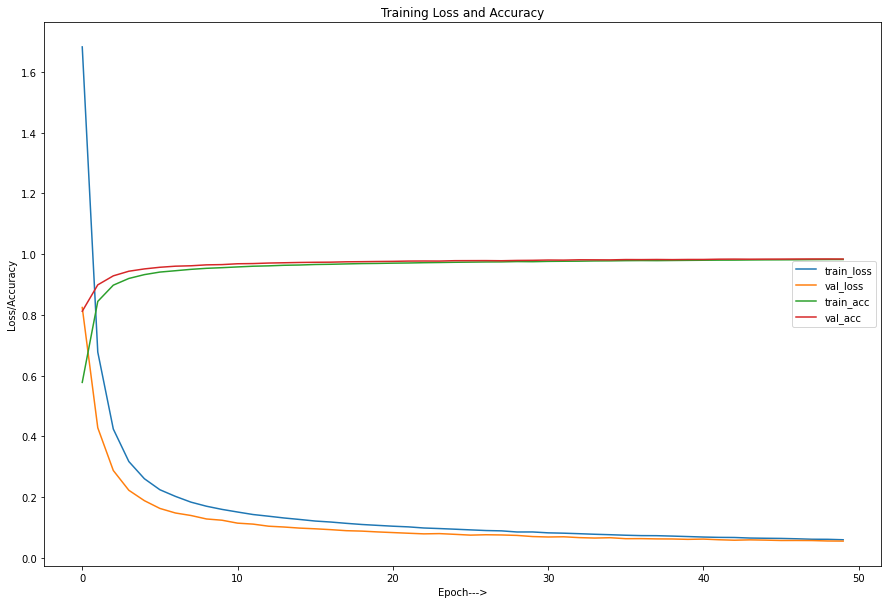

In [22]:

import matplotlib.pyplot as plt
%matplotlib inline
N = 50

plt.figure(figsize=(15,10))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch--->")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")

In [23]:
model.save('/content/drive/My Drive/OCR/Data/Model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/OCR/Data/Model/assets


In [24]:
model.save('/content/drive/My Drive/OCR/Data/Model.h5')